In [1]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:

# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()


In [5]:
# Create a DataFrame with the scaled data
scaled_data = scaler.fit_transform(market_data_df)
# Copy the crypto names from the original data
scaled_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

# Set the coinid column as index


# Display sample data
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))



# Create an empty list to store the inertia values
inertia =[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, n_init='auto', random_state=1)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k, 
    "inertia": inertia  
} 

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame({"k": k_values, "inertia" : inertia})

# Display the DataFrame
display(elbow_df)


c:\Users\kskorna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kskorna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kskorna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kskorna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:13

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,145.897940
3,4,131.457370
4,5,66.317106
5,6,57.402668
6,7,49.212644
7,8,44.799804
8,9,33.859468
9,10,29.250314


<Axes: xlabel='k'>

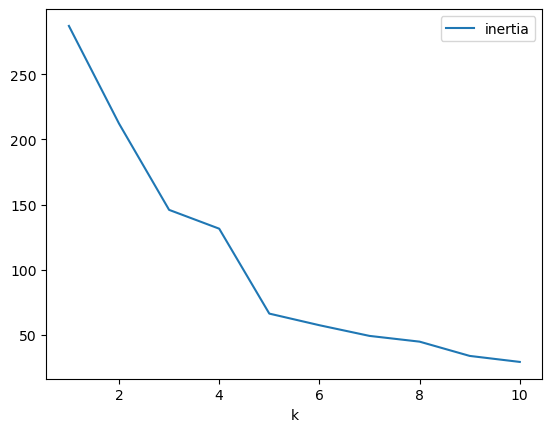

In [7]:
inertia_df = pd.DataFrame({"k": k_values, "inertia": inertia})
inertia_df.plot(x='k', y='inertia')



In [8]:
#k = inertia_df["k"]
#inertia = inertia_df['inertia']
#for i in range(1, len(k)):
    #percentage_decrease = (inertia[i-1] - inertia[1]) / inertia[1-1] * 100
    #print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

#### Answer the following question: 
**Question:** What is the best value for `k`? 


**Answer:** 3

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [9]:
# Initialize the K-Means model using the best value for k
KMeans_model = KMeans(n_clusters=5, random_state=0)


In [10]:
# Fit the K-Means model using the scaled data 
KMeans_model.fit(scaled_df ) 


c:\Users\kskorna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kskorna\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [11]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = KMeans_model.predict(scaled_df)

# View the resulting array of cluster values.
print(predicted_clusters)


[3 2 3 3 2 2 2 2 3 3 0 3 3 2 3 3 0 3 2 3 0 3 0 3 3 3 3 0 2 0 3 3 1 3 0 0 4
 0 3 3 0]


In [12]:
# Create a copy of the DataFrame
scaled_df_predict = scaled_df.copy()



In [13]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df_predict['predicted_cluster'] = predicted_clusters

# Display sample data
scaled_df_predict.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


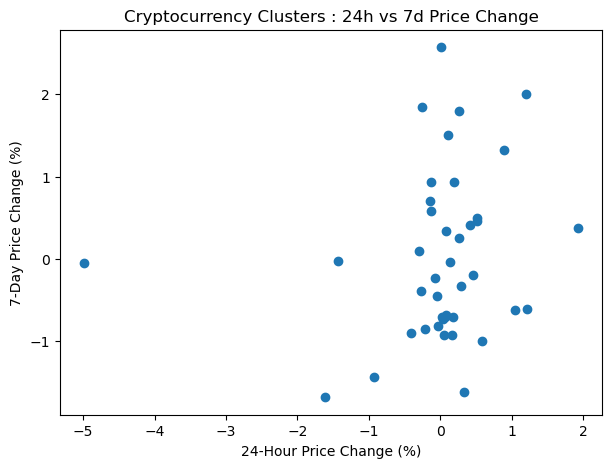

In [17]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

plt.figure(figsize= (7, 5))
plt.scatter(scaled_df_predict['price_change_percentage_24h'], scaled_df_predict['price_change_percentage_7d'],)
plt.title('Cryptocurrency Clusters : 24h vs 7d Price Change')
plt.xlabel('24-Hour Price Change (%)')
plt.ylabel('7-Day Price Change (%)')
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
scaled_data[PCA(n_components=3)]
pca_data = pca.fit_transform(scaled_df)
print(pca_data[:5])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.


# View the first five rows of the DataFrame. 


In [ ]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [ ]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame


In [ ]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k


In [ ]:
# Fit the K-Means model using the PCA data


In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data


# Print the resulting array of cluster values.


In [ ]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [ ]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 


### Determine the Weights of Each Feature on each Principal Component

In [ ]:
# Use the columns from the original scaled DataFrame as the index.


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    